# Task 3: Forest Cover Type Classification


### Description:
1. Dataset (Recommended): Covertype (UCI).
2. Predict the type of forest cover based on cartographic and environmental features.
3. Clean and preprocess the data including categorical handling.
4. Train and evaluate multi-class classification models.
5. Visualize confusion matrix and feature importance.

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

Load Dataset

In [2]:
data = pd.read_csv('/Users/ahmedyahia/Downloads/welcometotheelevvointernshipprogram/datasets/covertype.csv')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Understaning Data

In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

(581012, 55)

In [4]:
data.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Data Cleaning

In [5]:
drop_columns = ["Soil_Type"+str(i) for i in range(1,41)]

data = data.drop(columns=drop_columns, axis=0)
# check for missibg data
data.isna().sum().sum()
print(f'Missing data percentage: {100 - (data.shape[0]-data.isna().sum().sum())/data.shape[0]*100:.2f}%')

# check for duplicates
data.duplicated().sum().sum()
print(f'Duplicate data percentage: {100 - (data.shape[0]-data.duplicated().sum().sum())/data.shape[0]*100:.2f}%')

#check for outliers
outlier_counts = {}
outliers_percentage = {}
for feature in data.columns[:-1]:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    outlier_counts[feature] = len(outliers)
    outliers_percentage[feature] = 100 - (len(data[feature])-outlier_counts[feature])/len(data[feature])*100
    # print(f'{feature} Outliers percentage: {100 - (len(data[feature])-outlier_counts[feature])/len(data[feature])*100:.2f}%')
print(outliers_percentage)
    # if

Missing data percentage: 0.00%
Duplicate data percentage: 0.00%
{'Unnamed: 0': 2.6796348440307582, 'Unnamed: 1': 0.0, 'Unnamed: 2': 2.636090132389697, 'Elevation': 2.505455997466484, 'Aspect': 5.415206570604397, 'Slope': 0.11514392129595308, 'Horizontal_Distance_To_Hydrology': 3.0004543795997307, 'Vertical_Distance_To_Hydrology': 2.6973625329597297, 'Horizontal_Distance_To_Roadways': 1.3479928125408804, 'Hillshade_9am': 5.362539844271723, 'Hillshade_Noon': 0.0, 'Hillshade_3pm': 5.14343937818839, 'Horizontal_Distance_To_Fire_Points': 0.0, 'Wilderness_Area': 6.362691304138295}


Data visualisation

In [6]:
numerical_data = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_data))
categorical_data = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(categorical_data))

Numerical Columns: 15
Categorical Columns: 0


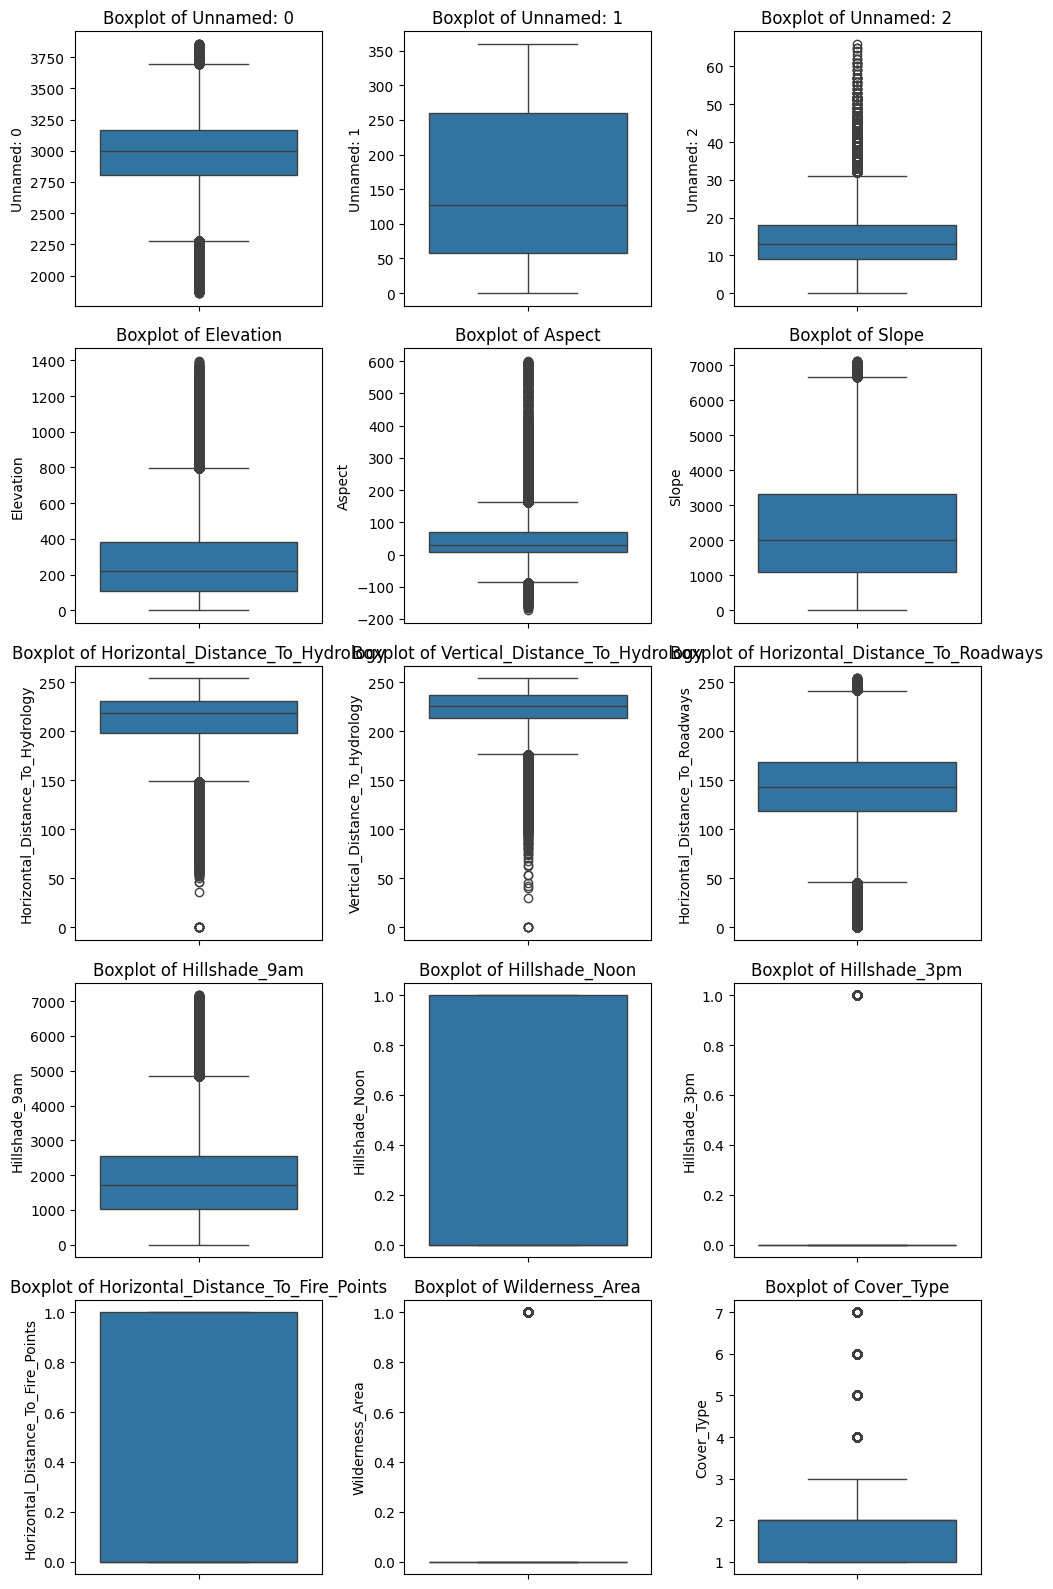

In [7]:
# Create grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(10, 16))
ax = ax.flatten()

# Generate one boxplot per numerical feature
for i, col in enumerate(numerical_data):
    sns.boxplot(y=data[col], ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')
    ax[i].set_ylabel(col)

# Hide any unused subplots
for j in range(len(numerical_data), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Data Splitting

In [8]:
X = data.drop(columns=['Cover_Type'])
y = data['Cover_Type']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Multi-class Classification Models

In [10]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
model3 = LogisticRegression()
model3.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluation

In [13]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [14]:
print(f'Decision Tree Accuracy: {accuracy_score(y_test,y_pred1)*100:.2f}%')
print(f'Random Forest Accuracy: {accuracy_score(y_test,y_pred2)*100:.2f}%')
print(f'Logistic Regression Accuracy: {accuracy_score(y_test,y_pred1)*100:.2f}%')


Decision Tree Accuracy: 92.34%
Random Forest Accuracy: 94.76%
Logistic Regression Accuracy: 92.34%


Confusion Matrix

In [15]:
cm1 = confusion_matrix(y_test,y_pred1)
cm2 = confusion_matrix(y_test,y_pred2)
cm3 = confusion_matrix(y_test,y_pred3)

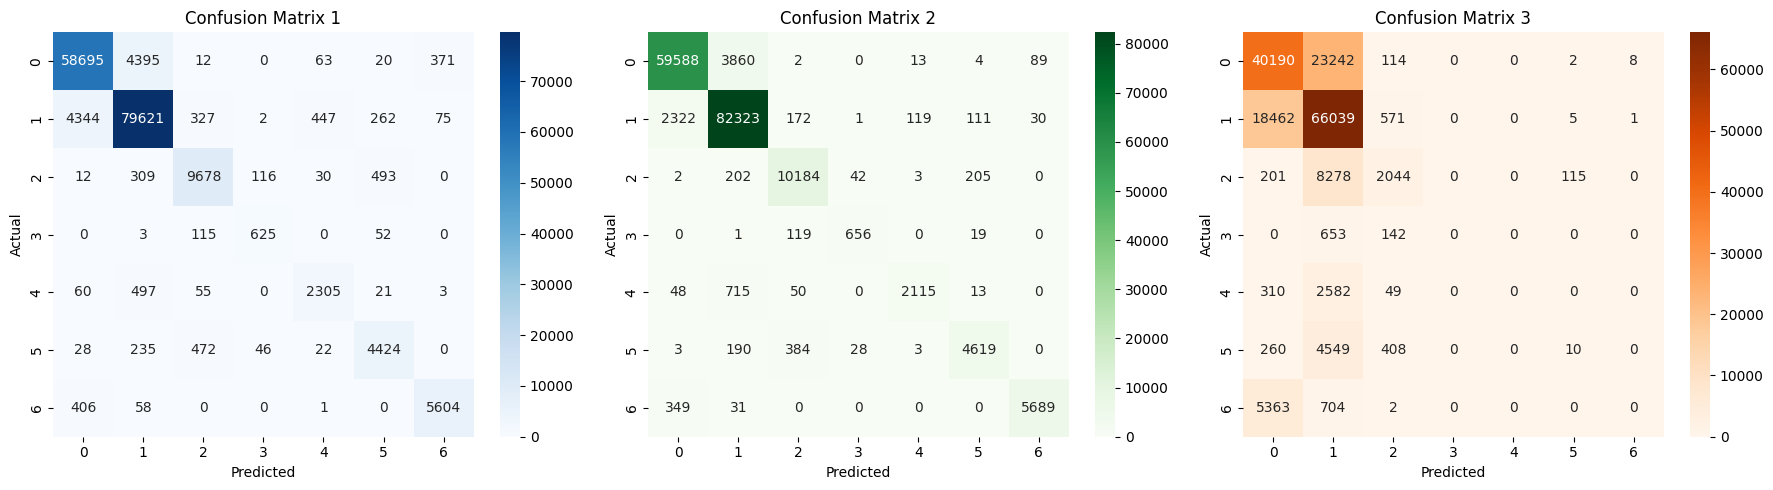

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix 1")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix 2")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm3, annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("Confusion Matrix 3")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Classification Report

In [17]:
print('Decision Tree Classification Report:\n ',classification_report(y_test,y_pred1))
print('Random Forest Classification Report:\n',classification_report(y_test,y_pred2))
print('Logistic Regression Classification Report:\n',classification_report(y_test,y_pred3))

Decision Tree Classification Report:
                precision    recall  f1-score   support

           1       0.92      0.92      0.92     63556
           2       0.94      0.94      0.94     85078
           3       0.91      0.91      0.91     10638
           4       0.79      0.79      0.79       795
           5       0.80      0.78      0.79      2941
           6       0.84      0.85      0.84      5227
           7       0.93      0.92      0.92      6069

    accuracy                           0.92    174304
   macro avg       0.88      0.87      0.87    174304
weighted avg       0.92      0.92      0.92    174304

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     63556
           2       0.94      0.97      0.96     85078
           3       0.93      0.96      0.95     10638
           4       0.90      0.83      0.86       795
           5       0.94      0.72      0.81      2941
 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Feature Importance

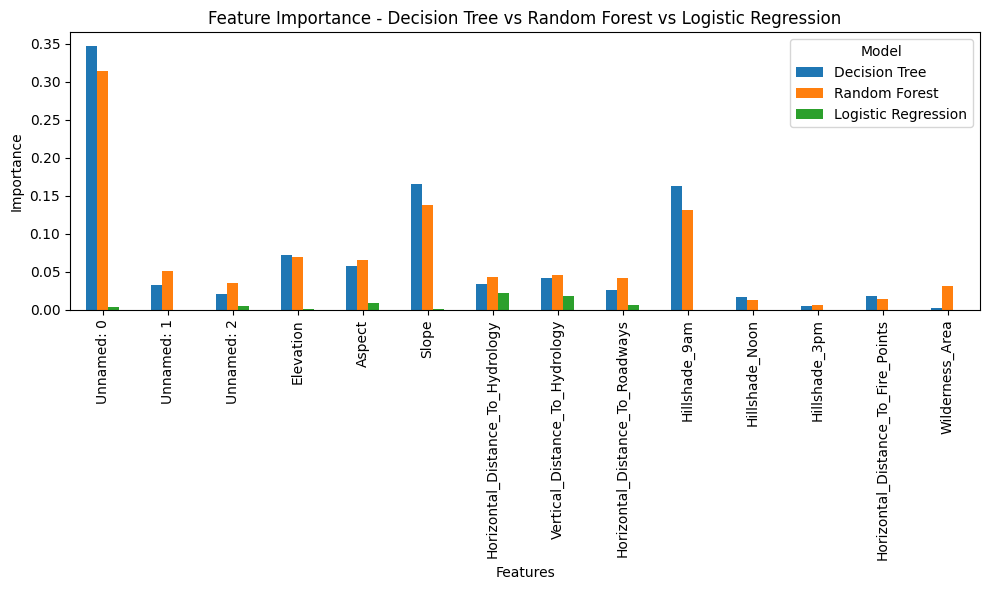

In [18]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Decision Tree': model1.feature_importances_,
    'Random Forest': model2.feature_importances_,
    'Logistic Regression': np.abs(model3.coef_)[0]})
importance_df = importance_df.set_index('Feature')
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance - Decision Tree vs Random Forest vs Logistic Regression')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.legend(title='Model')
plt.tight_layout()
plt.show()